## Import Package

In [674]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

In [675]:
data = pd.read_csv('HotelCustomersDataset.csv')

In [676]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

## Data Cleaning

In [677]:
# Check missing value
data.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [678]:
# Drop Nan Value
data.dropna(inplace=True)

In [679]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79811 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    79811 non-null  int64  
 1   Nationality           79811 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     79811 non-null  int64  
 4   NameHash              79811 non-null  object 
 5   DocIDHash             79811 non-null  object 
 6   AverageLeadTime       79811 non-null  int64  
 7   LodgingRevenue        79811 non-null  float64
 8   OtherRevenue          79811 non-null  float64
 9   BookingsCanceled      79811 non-null  int64  
 10  BookingsNoShowed      79811 non-null  int64  
 11  BookingsCheckedIn     79811 non-null  int64  
 12  PersonsNights         79811 non-null  int64  
 13  RoomNights            79811 non-null  int64  
 14  DaysSinceLastStay     79811 non-null  int64  
 15  DaysSinceFirstStay 

In [680]:
# Check duplicated rows
data.duplicated().sum()

0

looks good!

## Data Preprocessing

In [681]:
df=data.copy()

In [682]:
# Check unique value
df.nunique().to_frame(name = 'Unique Values')

,Unique Values
ID,79811
Nationality,188
Age,105
DaysSinceCreation,1095
NameHash,77375
DocIDHash,76760
AverageLeadTime,417
LodgingRevenue,10031
OtherRevenue,4393
BookingsCanceled,6


In [683]:
# Delete unecesssary column
df = df.drop(['ID', 'NameHash', 'DocIDHash'], axis=1).reset_index()

In [684]:
# Add new column
df['TotalRevenue'] = df['LodgingRevenue'] + df ['OtherRevenue']

# Delete column Revenue
df = df.drop(['LodgingRevenue', 'OtherRevenue'], axis=1)

In [685]:
# Separate columns
cats = list(df.select_dtypes(include=['object']))
nums = list(df.select_dtypes(include=['int64', 'float64']))

In [686]:
# Summary of Categorical Data
df[cats].describe()

,Nationality,DistributionChannel,MarketSegment
count,79811,79811,79811
unique,188,4,7
top,FRA,Travel Agent/Operator,Other
freq,12422,65692,46204


In [687]:
# Summary of Numerical Data
df[nums].describe()

,index,Age,DaysSinceCreation,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
count,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,...,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000,79811.000000
mean,42326.293944,45.398028,446.483267,66.809663,0.001842,0.000576,0.792948,4.698337,2.376276,394.310509,...,0.002919,0.001779,0.013382,0.357357,0.143426,0.000351,0.003571,0.000125,0.090890,370.115777
std,24012.564901,16.572368,310.620996,87.990086,0.065912,0.028312,0.690435,4.587289,2.196953,343.655426,...,0.053953,0.042143,0.114903,0.479224,0.350509,0.018727,0.059651,0.011193,0.287454,439.011845
min,0.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21679.500000,34.000000,174.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000
50%,42382.000000,46.000000,385.000000,30.000000,0.000000,0.000000,1.000000,4.000000,2.000000,350.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,292.000000
75%,63193.500000,57.000000,703.000000,104.000000,0.000000,0.000000,1.000000,8.000000,4.000000,678.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,502.000000
max,83589.000000,122.000000,1095.000000,588.000000,9.000000,3.000000,66.000000,116.000000,116.000000,1104.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11930.660000


<AxesSubplot:>

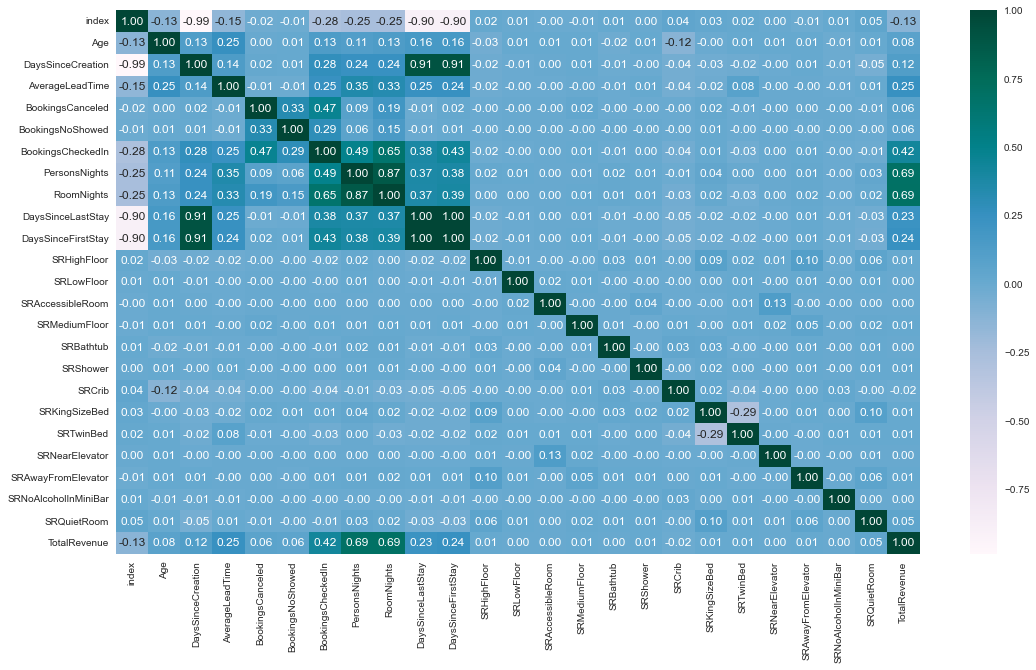

In [688]:
# Heatmap for choose feature
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='PuBuGn')

In [689]:
# Drop Unecessary column and low correlation
df.drop(['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
        'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
        'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
        'SRQuietRoom'], axis=1, inplace=True)

In [690]:
# Separate columns
cats = list(df.select_dtypes(include=['object']))
nums = list(df.select_dtypes(include=['int64', 'float64']))

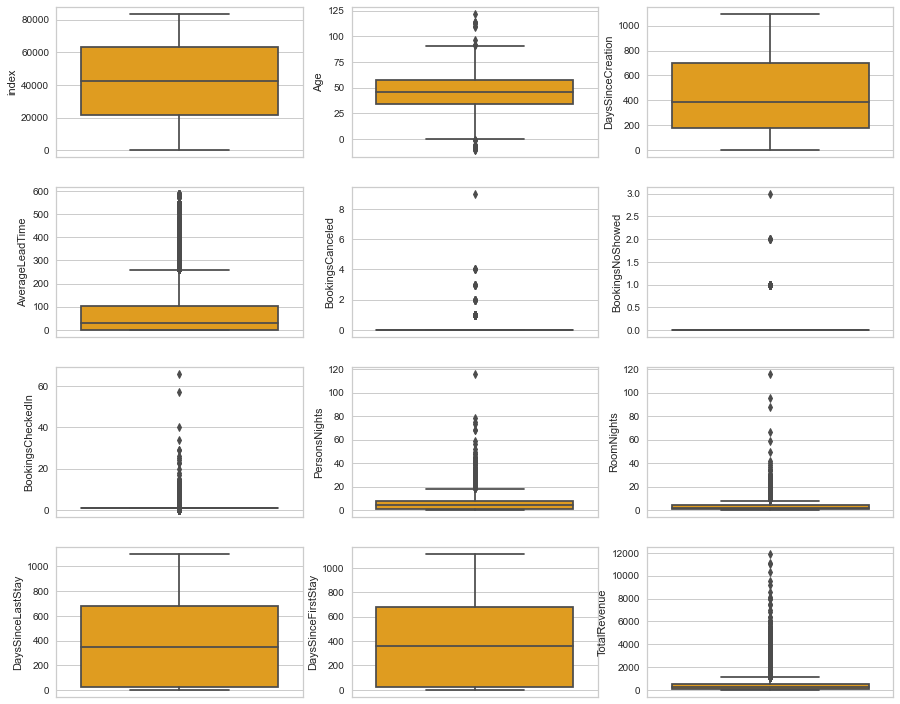

In [691]:
# Check outlier after cleaned
plt.figure(figsize=(15,16))

# plotting
for i in range (0, len(nums)):
    plt.subplot(5, len(nums)//4, i+1)
    sns.boxplot(y=df[nums[i]], color='orange')

In [692]:
# Cleaning outlier

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

fil_ent = np.array([True] * len(df))
for col in ['Age', 'AverageLeadTime', 'PersonsNights', 'TotalRevenue']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df[col] >= low_limit) & (df[col] <= high_limit)) & fil_ent
    
df = df[fil_ent].reset_index()

print('Jumlah baris setelah memfilter outlier', len(df))

Jumlah baris sebelum memfilter outlier: 79811
Jumlah baris setelah memfilter outlier 72907


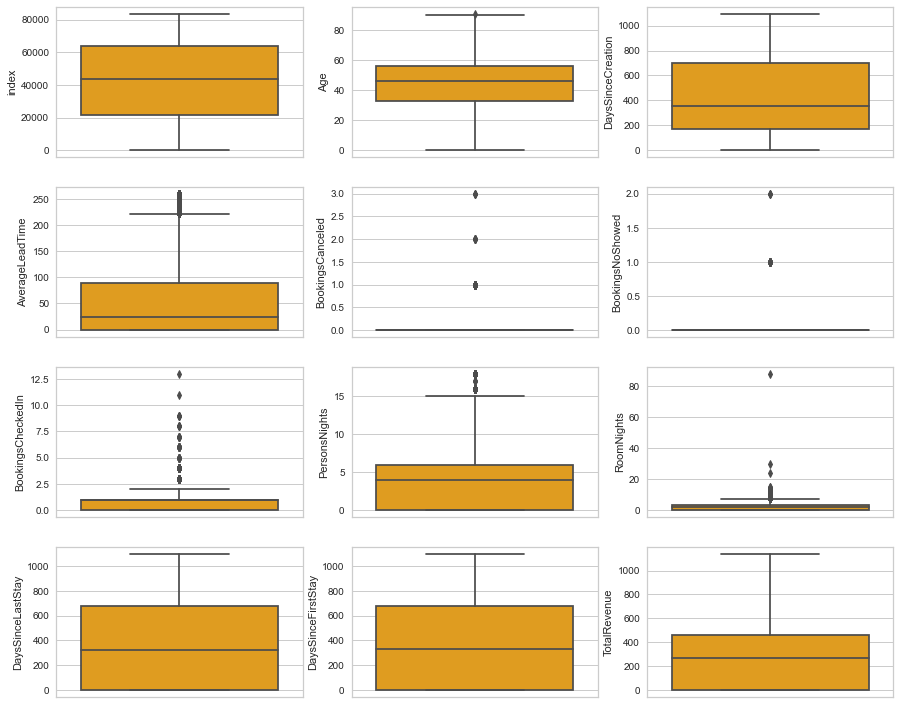

In [693]:
# Check outlier after cleaned
plt.figure(figsize=(15,16))

# plotting
for i in range (0, len(nums)):
    plt.subplot(5, len(nums)//4, i+1)
    sns.boxplot(y=df[nums[i]], color='orange')

more good!

## Explanatory Data

<AxesSubplot:xlabel='Age', ylabel='Count'>

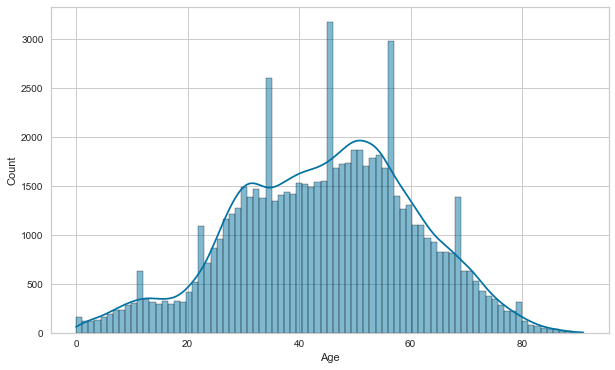

In [694]:
# Just see distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', kde=True)

In [695]:
# Groupby Nationality
rev_1 = (df.groupby('Nationality')
        .agg(Revenue=('TotalRevenue', 'sum'))
        .reset_index()
        .sort_values('Revenue', ascending=False)
        .head(10))
rev_1

,Nationality,Revenue
57,FRA,3624047.63
43,DEU,2655491.15
60,GBR,2415980.63
135,PRT,1772857.92
51,ESP,1414906.66
15,BEL,973522.34
83,ITA,954546.35
174,USA,811441.74
121,NLD,803518.39
24,BRA,717583.93


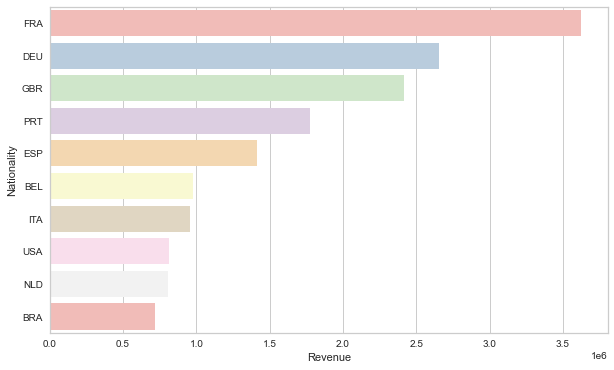

In [696]:
# Top 10 countries with the highest total spending on hotels
plt.figure(figsize=(10,6))
sns.barplot(data=rev_1, x='Revenue', y='Nationality', palette='Pastel1')
plt.show()

<AxesSubplot:xlabel='BookingsCheckedIn', ylabel='count'>

<Figure size 576x396 with 0 Axes>

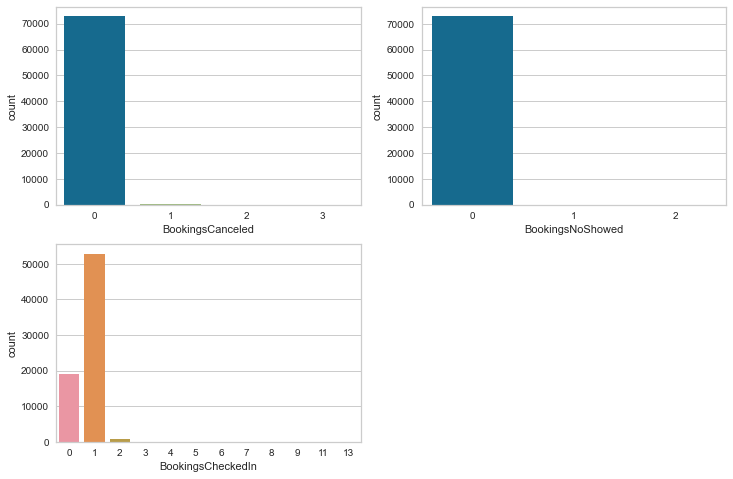

In [697]:
# Status Booked

plt.figure (1)
plt.figure(figsize=(12,8))

# Bookings Canceled
plt.subplot(221)
sns.countplot(data=df, x='BookingsCanceled')

# Bookings No Showed
plt.subplot(222)
sns.countplot(data=df, x='BookingsNoShowed')

# Bookings Checked In
plt.subplot(223)
sns.countplot(data=df, x='BookingsCheckedIn')

<AxesSubplot:xlabel='PersonsNights', ylabel='Count'>

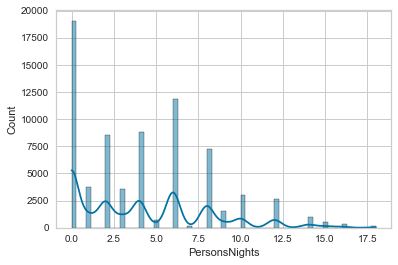

In [698]:
# Just see distribution of Person Night
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='PersonsNights', kde=True)

<AxesSubplot:xlabel='DistributionChannel', ylabel='count'>

<Figure size 576x396 with 0 Axes>

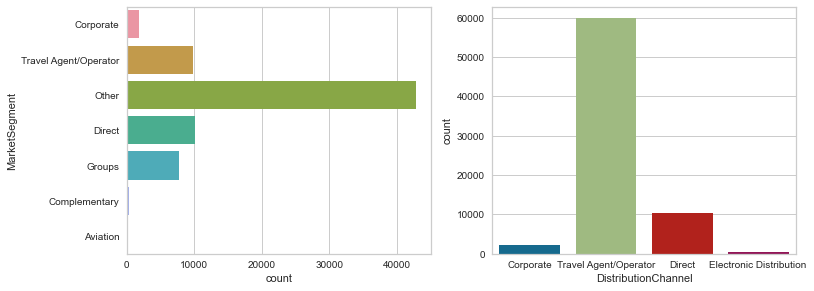

In [699]:
# Marketing
plt.figure (1)
plt.figure(figsize=(12, 10))

# Market Segment
plt.subplot(221)
sns.countplot(data=df, y='MarketSegment')

# Distribution Channel
plt.subplot(222)
sns.countplot(data=df, x='DistributionChannel')

## Normalization Data

In [700]:
# Feature Selection
feature = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'PersonsNights', 'TotalRevenue']
x = df[feature].values

In [701]:
#x = pd.get_dummies(df[feature], drop_first=True)

In [702]:
from sklearn.preprocessing import MinMaxScaler
df_std = MinMaxScaler().fit_transform(x)
dfc = pd.DataFrame(data=df_std, columns=[feature])

In [703]:
dfc.head()

,Age,DaysSinceCreation,AverageLeadTime,PersonsNights,TotalRevenue
0,0.560440,0.136986,0.176245,0.444444,0.417441
1,0.340659,1.000000,0.003831,0.000000,0.000000
2,0.659341,1.000000,0.360153,0.555556,0.262927
3,0.560440,1.000000,0.003831,0.000000,0.000000
4,0.593407,1.000000,0.226054,0.222222,0.222612


### === Yellowbrick method

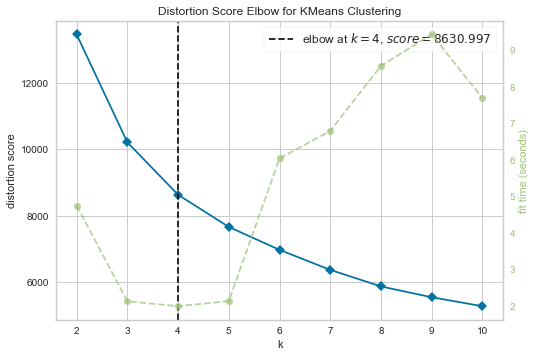

In [704]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

fig, ax = plt.subplots()
visualizer = KElbowVisualizer(KMeans(), k=(2,11), ax=ax)
visualizer.fit(dfc)

ax.set_xticks(range(2,11))
visualizer.show()
plt.show()

### === Elbow Plot

In [705]:
from sklearn.cluster import KMeans

list_inertia = []
for i in range (2, 11):
    print('n_clusters iterasi ke-',i)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dfc)
    nilai_iterasi = kmeans.inertia_
    print(nilai_iterasi)
    print(' ')
    list_inertia.append(nilai_iterasi)

list_inertia

n_clusters iterasi ke- 2
13460.211257984178
 
n_clusters iterasi ke- 3
10212.226638682048
 
n_clusters iterasi ke- 4
8631.112549608752
 
n_clusters iterasi ke- 5
7662.567635558184
 
n_clusters iterasi ke- 6
6972.348406023693
 
n_clusters iterasi ke- 7
6369.371367914984
 
n_clusters iterasi ke- 8
5870.742969006882
 
n_clusters iterasi ke- 9
5545.091614551045
 
n_clusters iterasi ke- 10
5275.246182761468
 


[13460.211257984178,
 10212.226638682048,
 8631.112549608752,
 7662.567635558184,
 6972.348406023693,
 6369.371367914984,
 5870.742969006882,
 5545.091614551045,
 5275.246182761468]

<AxesSubplot:>

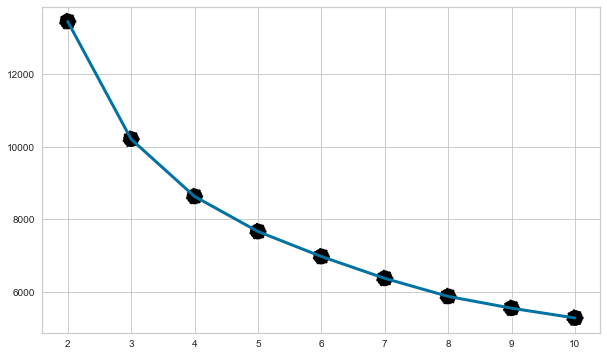

In [706]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(2, 11), y=list_inertia, linewidth = 3)
sns.scatterplot(x=range(2, 11), y=list_inertia, s=300, color='black',  linestyle='--')


# =====================================

In [707]:
# Modelling to KMeans
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)
model.fit(dfc.values)

KMeans(n_clusters=4, random_state=42)

In [708]:
# Model predict
dfc['cluster'] = model.labels_

In [709]:
#dfc = dfc.reset_index()

In [710]:
dfc['cluster'].value_counts()

(cluster,)
0             26404
3             19025
2             15376
1             12102
dtype: int64

## Visualization

In [711]:
# Reduction PCA for visualization 2 dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pci = pca.fit_transform(dfc)

In [712]:
# Create Dataset for visualize 2 dimension
data_pca = pd.DataFrame(data = pci, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfc['cluster']
data_pca

,PC 1,PC 2,cluster
0,0.601841,0.122381,2
1,1.642025,-0.607874,3
2,1.727943,0.085028,3
3,1.646269,-0.581676,3
4,1.691324,-0.200450,3
...,...,...,...
72902,-1.454589,-0.219261,0
72903,0.584790,0.288661,2
72904,-1.454801,-0.220571,0
72905,0.622822,0.519702,2


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

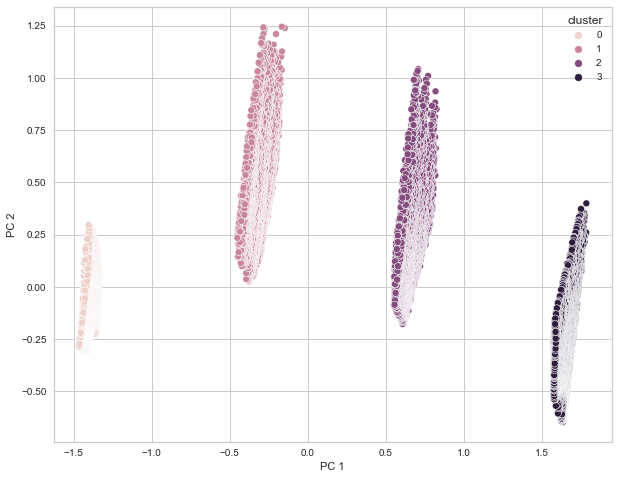

In [713]:
# Visualization 2 dimension for clusters
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_pca, x='PC 1', y='PC 2', hue='cluster')

## Insight

In [714]:
insight = df[feature].reset_index()
insight['cluster']=dfc['cluster']

In [715]:
display(insight.drop('index',axis=1).groupby('cluster').agg(['mean']))

,Age,DaysSinceCreation,AverageLeadTime,PersonsNights,TotalRevenue
,mean,mean,mean,mean,mean
cluster,,,,,
0,40.578397,193.626913,8.235495,0.757082,65.115519
1,49.893158,487.818873,174.140225,6.462568,421.012747
2,46.355814,354.904266,55.517755,8.051899,612.276833
3,46.039212,831.553850,37.935138,4.479737,290.420243


Bahasa Indonesia
- Cluster 0 (solo traveller) : merupakan pelanggan dengan usia rata-rata 41 tahun, sudah terdaftar menjadi pelanggan hotel kurang lebih 6 bulan yang lalu, pelanggan ini memesan hotel dekat dengan hari sebelum ia checkin dengan rata-rata 8 hari sebelum kedatangan, hanya 1 orang yang menginap, dan mengeluarkan uang hingga 65 dollar.
- Cluster 1 : merupakan pelanggan degan usia rata-rata 50 tahun, juga sudah terdaftar hampir 1,5 tahun, pelanggan ini memesan kamar hotel 6 bulan sebelum kedatangan, dengan rata-rata 6 orang yang menginap, sedangkan pengeluaran selama di hotel yaitu 421 dollar.
- Cluster 2: dengan usia rata-rata 46 tahun, yang telah terdaftar selama 1 tahun, pelanggan ini memesan hotel rata-rata 2 bulan sebelum kedatangan dengan 8 orang yang menginap dan rata-rata menghabiskan 612 dolar.
- Cluster 3 : merupakan pelanggan dengan usia 46 tahun, yang telah terdaftar lama yaitu lebih dari 2 tahun, dan memesan kamar hotel sebulan sebelum check-in, dengan rata-rata 4 orang yang menginap, dan mengeluarkan 290 dollar.

English Language
- Cluster 0 (solo traveler): a customer with an average age of 41 years, registered as a hotel customer approximately 6 months ago, this customer booked a hotel close to the day before he checked in with an average of 8 days before arrival, only 1 person who stays, and spends up to 65 dollars.
- Cluster 1: customers with an average age of 50 years, have also been registered for almost 1.5 years, these customers book hotel rooms 6 months before arrival, with an average of 6 people staying, while spending while at the hotel is 421 dollars .
- Cluster 2: with an average age of 46 years, registered for 1 year, these customers booked hotels an average of 2 months before arrival with 8 people staying and spent an average of 612 dollar.
- Cluster 3: is a customer with the age of 46 years, who has been registered for a long time, namely more than 2 years, and booked a hotel room a month before check-in, with an average of 4 people staying, and spent 290 dollars.

## Thank's